In [1]:
import numpy as np
from SegTree import *
from LazySegTree import *
import time
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def compare(n=100000,repetitions = 10,m=100000,update_probability=0.1,skip_nonlazy=False):
    limit = 10000
    size = n
    n_ops = m
    times = []
    for i in range(repetitions):
        start = time.time()
        run_python_operations(limit, size, n_ops,update_probability=update_probability,seed=i)
        times.append(time.time()-start)
    t1=np.mean(times)
    print(f'Default Python time: {t1} seconds.')

    if not skip_nonlazy:
        times = []
        for i in range(repetitions):
            start = time.time()
            run_segtree_operations(limit, size, n_ops, lazy=False,update_probability=update_probability,seed=i)
            times.append(time.time()-start)
        t2 = np.mean(times)
    t2=np.nan
    print(f'Segtree without lazy propagation: {t2} seconds.')
    times = []
    for i in range(repetitions):
        start = time.time()
        run_segtree_operations(limit, size, n_ops, lazy=True,update_probability=update_probability,seed=i)
        times.append(time.time()-start)
    t3 = np.mean(times)
    print(f'Segtree with lazy propagation: {t3} seconds.')
    return [t1,t2,t3]

def run_python_operations(limit, size, n_ops, update_probability=0 ,seed=0):
    np.random.seed(seed)
    arr = np.random.randint(0, limit, size=size).tolist()
    split = (1-update_probability)/2
    for i in range(n_ops):
        #operation
        op = np.random.rand()
        #left and right bounds
        l = np.random.randint(0,len(arr))
        r = np.random.randint(l,len(arr))

        if op <=split: # query minimum
            min(arr[l:r+1])
        elif op <= 2*split: #query sum
            sum(arr[l:r])
        else: #update
            value = np.random.randint(0, limit)
            update = lambda splice : (x+value for x in splice)
            arr[l:r] = update(arr[l:r])
    
    return

def run_segtree_operations(limit, size, n_ops,update_probability=0, seed=0,lazy=False):
    np.random.seed(seed)
    arr = np.random.randint(0, limit, size=size).tolist()
    split = (1-update_probability)/2
    if lazy:
        seg = LazySegTree(arr)
    else:
        seg = SegTree(arr)

    for i in range(n_ops):
        #operation
        op = np.random.rand()
        #left and right bounds
        l = np.random.randint(0,len(arr))
        r = np.random.randint(l,len(arr))

        if op <=split: # query minimum
            seg.queryMin(l,r)
        elif op <= 2*split: #query sum
            seg.querySum(l,r)
        else: #update
            value = np.random.randint(0, limit)
            seg.update(l,r,value)
    
    return

In [9]:
nComparison = pd.DataFrame(columns=['Python','Segment Tree','Segment Tree w/ Lazy Propagation'])
ns = [10**2,10**3,10**4,10**5,10**6]
m = 10**4
for n in ns:
    nComparison.loc[len(nComparison)] = compare(n=n,m=m,update_probability=0.05)

Default Python time: 0.07710976600646972 seconds.
Segtree without lazy propagation: 0.18901503086090088 seconds.
Segtree with lazy propagation: 0.1914144992828369 seconds.
Default Python time: 0.11296298503875732 seconds.
Segtree without lazy propagation: 0.4739459753036499 seconds.
Segtree with lazy propagation: 0.30888166427612307 seconds.
Default Python time: 0.40865654945373536 seconds.
Segtree without lazy propagation: 2.7287153720855715 seconds.
Segtree with lazy propagation: 0.5761997699737549 seconds.
Default Python time: 5.154126143455505 seconds.
Segtree without lazy propagation: 23.85860433578491 seconds.
Segtree with lazy propagation: 1.3637008190155029 seconds.
Default Python time: 75.71535444259644 seconds.
Segtree without lazy propagation: 230.21457192897796 seconds.
Segtree with lazy propagation: 7.948265552520752 seconds.


In [10]:
nComparison.index = ns

In [12]:
nComparison

,Python,Segment Tree,Segment Tree w/ Lazy Propagation
100,0.077110,0.189015,0.191414
1000,0.112963,0.473946,0.308882
10000,0.408657,2.728715,0.576200
100000,5.154126,23.858604,1.363701
1000000,75.715354,230.214572,7.948266


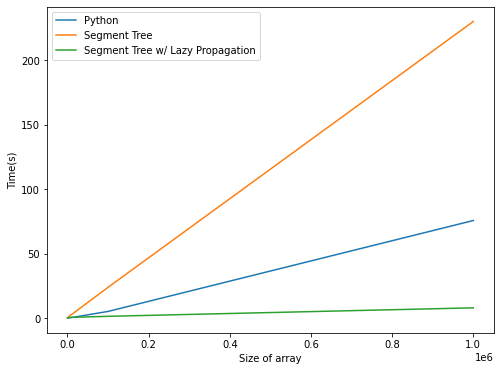

In [ ]:
nComparison.plot(figsize=(8,6))
plt.xlabel('Size of array')
plt.ylabel('Time(s)')
plt.xscale('log')
plt.show()

In [ ]:
opComparison = pd.DataFrame(columns=['Python','Segment Tree','Segment Tree w/ Lazy Propagation'])

In [28]:

ops = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
n = 10**5
m = 10**4
for op in ops:
    opComparison.loc[len(opComparison)] = compare(n=n,m=m,update_probability=op,skip_nonlazy=True)
opComparison.index=ops

Default Python time: 11.20081205368042 seconds.
Segtree without lazy propagation: nan seconds.
Segtree with lazy propagation: 1.6158000707626343 seconds.
Default Python time: 15.800447630882264 seconds.
Segtree without lazy propagation: nan seconds.
Segtree with lazy propagation: 1.673483633995056 seconds.
Default Python time: 16.42021825313568 seconds.
Segtree without lazy propagation: nan seconds.
Segtree with lazy propagation: 1.6701612710952758 seconds.
Default Python time: 17.784100031852724 seconds.
Segtree without lazy propagation: nan seconds.
Segtree with lazy propagation: 1.6037217378616333 seconds.
Default Python time: 19.048831057548522 seconds.
Segtree without lazy propagation: nan seconds.
Segtree with lazy propagation: 1.6632397413253783 seconds.
Default Python time: 20.76751365661621 seconds.
Segtree without lazy propagation: nan seconds.
Segtree with lazy propagation: 1.6911156177520752 seconds.
Default Python time: 22.62471652030945 seconds.
Segtree without lazy propa

ValueError: Length mismatch: Expected axis has 11 elements, new values have 7 elements

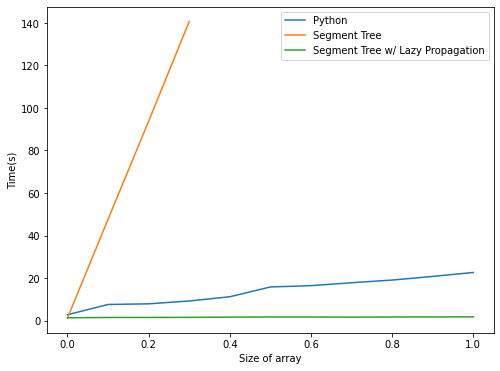

In [30]:
opComparison.plot(figsize=(8,6))
plt.xlabel('Size of array')
plt.ylabel('Time(s)')
plt.show()

In [31]:
opComparison

,Python,Segment Tree,Segment Tree w/ Lazy Propagation
0.0,2.734669,1.212784,1.300924
0.1,7.559742,47.677828,1.445500
0.2,7.863501,93.790845,1.462800
0.3,9.207000,140.700101,1.496899
0.4,11.200812,NaN,1.615800
0.5,15.800448,NaN,1.673484
0.6,16.420218,NaN,1.670161
0.7,17.784100,NaN,1.603722
0.8,19.048831,NaN,1.663240
0.9,20.767514,NaN,1.691116
